In [179]:
%matplotlib notebook

from modsim import *

In [180]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [181]:
#mass of person
mass = 62.1422

In [182]:
#constants
g = 9.81
k_trampoline = 200

In [183]:
#starting conditions
init = State(y = 0,
             v = 3)

In [184]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [185]:
system = System(init=init, g=g, ts=ts)

In [186]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [187]:
slope_func(init, 0 , system)

(3, -9.81)

In [188]:
run_odeint(system, slope_func)

In [234]:
def plot_position(results, x = ''):
    plot(results.y, label = x)
    legend = False
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)',
            legend = False)

<IPython.core.display.Javascript object>


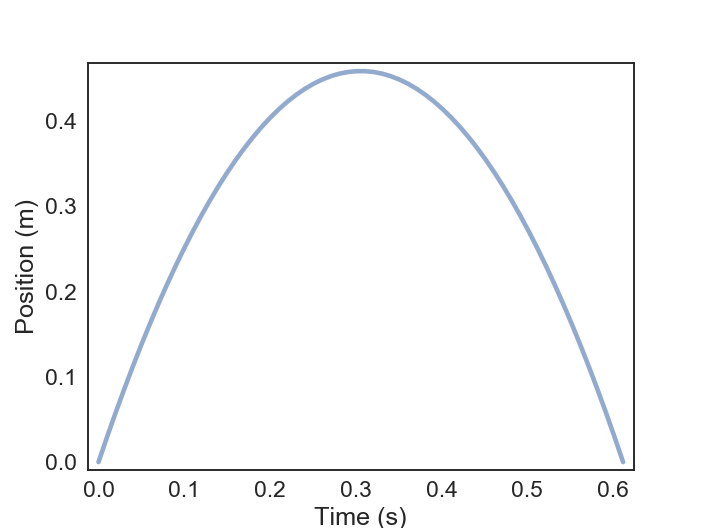

In [235]:
newfig()
plot_position(system.results)

In [236]:
d = 0.45859872611464

In [237]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

929.07606569715108

In [253]:
k = 0

In [254]:
#legs
x = .2
leg_PE = 1/2 * k * x**2

In [255]:
Total_PE = tramp_PE + leg_PE

In [256]:
v_up = sqrt(2 * Total_PE / mass)

In [257]:
init_up = State(y = 0,
                v = v_up)

In [258]:
duration_up = v_up/g + duration

In [259]:
ts_up = linrange(duration, duration_up, .01)

In [260]:
system_up = System(init=init_up, g=g, ts=ts_up)

In [261]:
slope_func(init_up, 0, system_up)

(5.4682369066363616, -9.81)

In [262]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


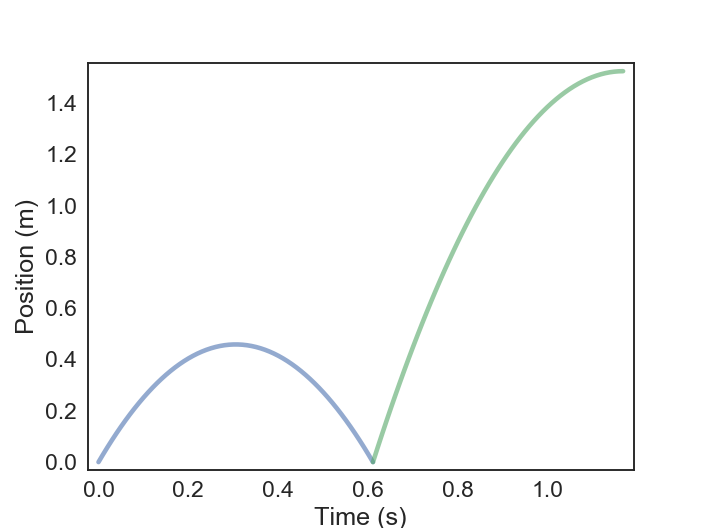

Saving figure to file no legs.eps


In [265]:
newfig()
plot_position(system.results)
plot_position(system_up.results)
savefig('no legs.eps')

In [249]:
k_values = linspace(.1, 100000, 21)
sweep = SweepSeries()

In [250]:
def plot_sweep():
    newfig()
    plot_position(system.results)
    for k in k_values:
        x = .2
        leg_PE = 1/2 * k * x**2
        Total_PE = tramp_PE + leg_PE
        v_up = sqrt(2 * Total_PE / mass)
        init_up = State(y = 0,
                        v = v_up)
        duration_up = v_up/g + duration
        ts_up = linrange(duration, duration_up, .01)
        system_up = System(init=init_up, g=g, ts=ts)
        slope_func(init_up, 0, system_up)
        run_odeint(system_up, slope_func)
        sweep[k] = system_up.results
        plot_position(sweep[k], int(k))
    

<IPython.core.display.Javascript object>


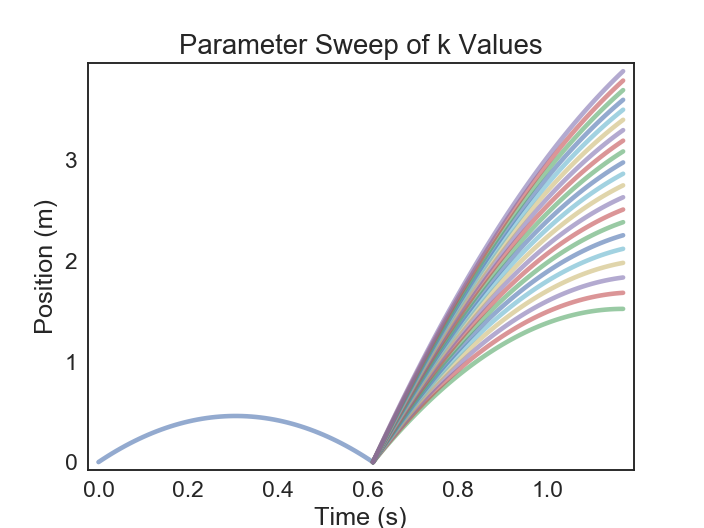

Saving figure to file Param Sweep.eps


In [252]:
plot_sweep()
decorate(title = 'Parameter Sweep of k Values', legend = False)
savefig('Param Sweep.eps')

In [207]:
k_values

array([  1.00000000e-01,   5.00009500e+03,   1.00000900e+04,
         1.50000850e+04,   2.00000800e+04,   2.50000750e+04,
         3.00000700e+04,   3.50000650e+04,   4.00000600e+04,
         4.50000550e+04,   5.00000500e+04,   5.50000450e+04,
         6.00000400e+04,   6.50000350e+04,   7.00000300e+04,
         7.50000250e+04,   8.00000200e+04,   8.50000150e+04,
         9.00000100e+04,   9.50000050e+04,   1.00000000e+05])